In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/BeerWineLiquor.csv')

In [3]:
df.head(3)

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597


In [5]:
df.columns = ['ds','y']

In [6]:
df.head(1)

,ds,y
0,1/1/1992,1509


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head(1)

,ds,y
0,1992-01-01,1509


In [9]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future = model.make_future_dataframe(periods=24,freq='MS')

In [12]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [13]:
len(future),len(df)

(348, 324)

In [15]:
forecast = model.predict(future)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1773.449803,1146.309526,1473.254546,1773.449803,1773.449803,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,0.0,0.0,0.0,1311.673097
1,1992-02-01,1776.239771,1199.379432,1514.507816,1776.239771,1776.239771,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,0.0,0.0,0.0,1348.648735
2,1992-03-01,1778.849740,1420.342193,1778.082666,1778.849740,1778.849740,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,0.0,0.0,0.0,1599.668420
3,1992-04-01,1781.639707,1421.771655,1744.083899,1781.639707,1781.639707,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,0.0,0.0,0.0,1585.328104
4,1992-05-01,1784.339676,1673.873265,1996.217582,1784.339676,1784.339676,45.026915,45.026915,45.026915,45.026915,45.026915,45.026915,0.0,0.0,0.0,1829.366590


In [18]:
forecast[['ds','yhat_lower','yhat','yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
343,2020-08-01,5075.213511,5241.229670,5419.151631
344,2020-09-01,4921.520350,5084.201064,5246.235174
345,2020-10-01,5031.710093,5189.365538,5345.798653
346,2020-11-01,5185.042342,5335.418277,5492.931614
347,2020-12-01,6176.235374,6335.779667,6494.187521


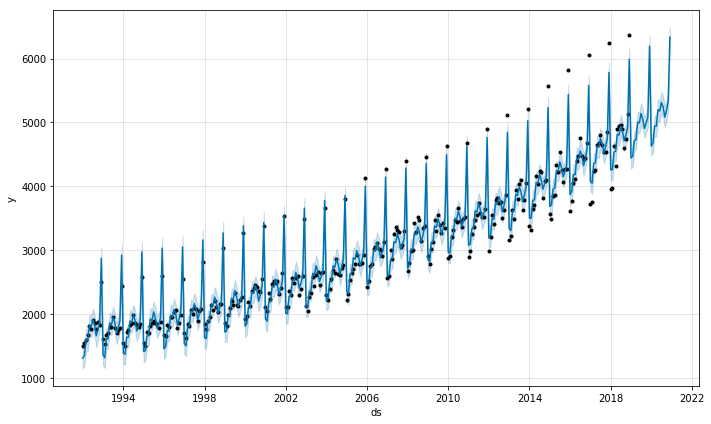

In [32]:
model.plot(forecast);

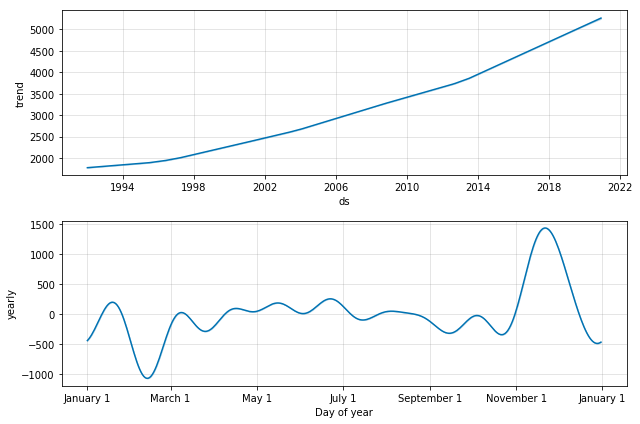

In [33]:
model.plot_components(forecast);

### Project 2

In [34]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/Miles_Traveled.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
ds    588 non-null datetime64[ns]
y     588 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [35]:
df.head(1)

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0


In [38]:
df.columns=['ds','y']

In [39]:
df['ds']=pd.to_datetime(df['ds'])

In [47]:
df.head(3)

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0


In [53]:
len(df)

588

In [54]:
train = df[:-12]
test = df[-12:]

In [59]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263348.877048,274034.646601,285742.801981,263232.369260,263395.671324,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,0.0,0.0,0.0,279797.640692
584,2018-09-01,263489.606772,256159.687476,267505.502748,263337.749666,263567.022312,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,0.0,0.0,0.0,261820.114321
585,2018-10-01,263625.796827,263168.738108,274820.640059,263433.191142,263727.916096,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,0.0,0.0,0.0,268933.596004
586,2018-11-01,263766.526551,249727.434013,261740.144842,263525.048089,263896.570079,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,0.0,0.0,0.0,255559.834111
587,2018-12-01,263902.716607,251342.371670,262863.445612,263618.386641,264059.072296,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,0.0,0.0,0.0,256982.083393


In [62]:
pd.plotting.register_matplotlib_converters()

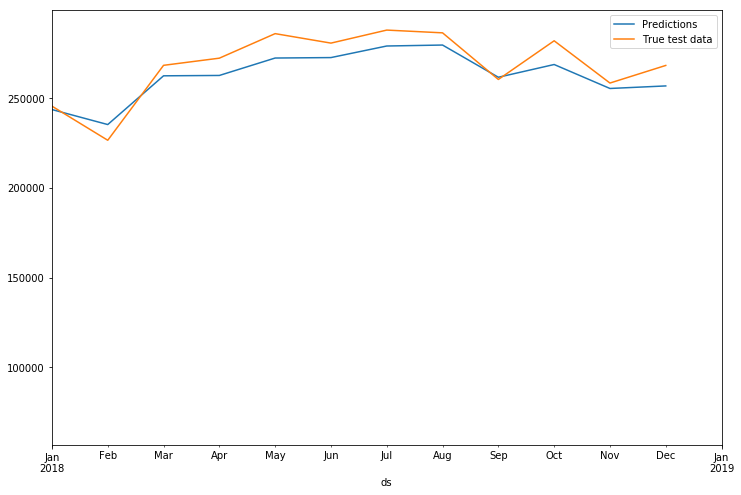

In [64]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True test data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))


In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(test['y'],forecast[-12:]['yhat']))

8661.095901709492

In [67]:
from statsmodels.tools.eval_measures import rmse
rmse(test['y'],forecast[-12:]['yhat'])

8661.095901709492

In [68]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
pd.Timedelta()

In [69]:
#initial - 5 years of data
initial = 5 * 365
initial = str(initial) + ' days' #must be exactly this format
#periods - fold every 5 years
period = 5 * 365
period = str(period) + ' days'
#horizon - forecasting 1 year ahead
horizon = 365
horizon = str(horizon) + ' days'

In [70]:
df_cv = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00
/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [71]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087392,107024.652539,109873.458297,102445.0,1976-12-11
1,1977-02-01,102996.111524,101628.917575,104341.589844,102416.0,1976-12-11
2,1977-03-01,118973.318121,117540.283018,120397.567816,119960.0,1976-12-11
3,1977-04-01,120612.923715,119181.718127,121937.767826,121513.0,1976-12-11
4,1977-05-01,127883.031835,126322.059973,129319.261252,128884.0,1976-12-11


In [72]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,52 days,2.475016e+07,4974.953321,4574.792884,0.027989,0.4
1,53 days,2.225769e+07,4717.805405,4310.286545,0.025251,0.4
2,54 days,1.881510e+07,4337.637524,3795.378420,0.020424,0.5
3,55 days,2.372965e+07,4871.309349,4310.859315,0.023444,0.4
4,57 days,2.148966e+07,4635.693756,4041.835674,0.021690,0.5
5,58 days,2.375941e+07,4874.362205,4318.457749,0.022894,0.4
6,59 days,3.856195e+07,6209.826735,5136.181340,0.026582,0.4
7,60 days,3.958566e+07,6291.713893,5221.041143,0.027141,0.4
8,62 days,3.772553e+07,6142.111310,4976.625537,0.026069,0.4
9,80 days,3.263659e+07,5712.844577,4355.134556,0.023947,0.5


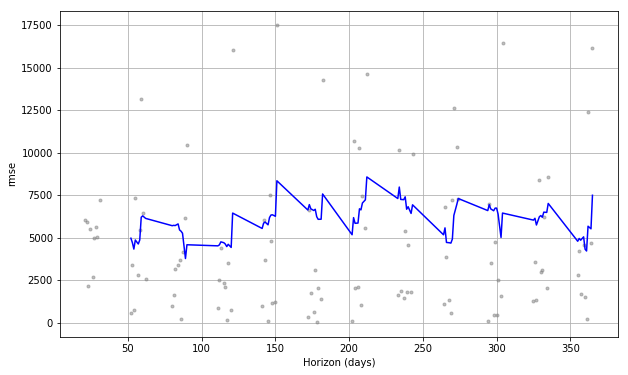

In [75]:
plot_cross_validation_metric(df_cv,metric='rmse');

### Trend

In [76]:
df=pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/HospitalityEmployees.csv')

In [77]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

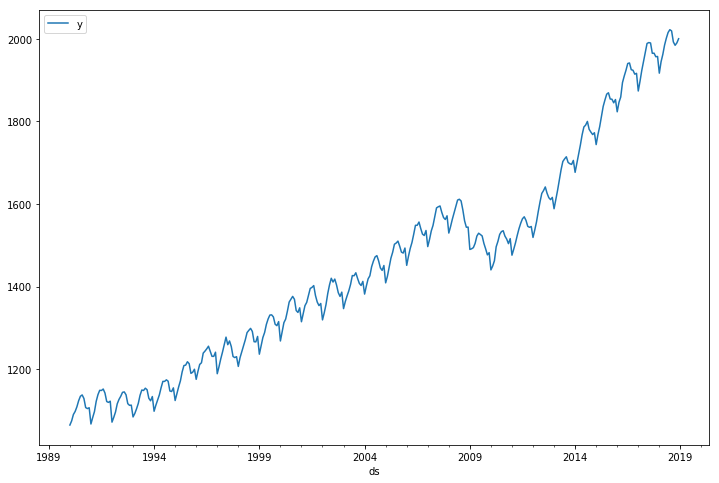

In [78]:
df.plot(x='ds',y='y',figsize=(12,8))

In [79]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


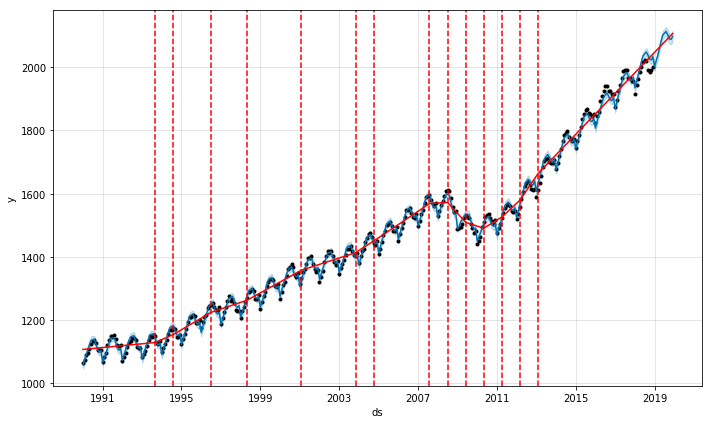

In [80]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

### Changing seasonality

In [81]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv')

In [82]:
df.head(1)

,Month,Thousands of Passengers
0,1949-01,112


In [83]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


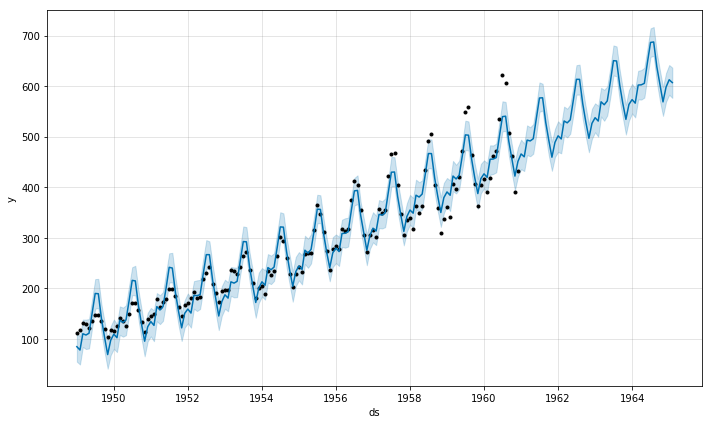

In [84]:
m=Prophet()
m.fit(df)
future=m.make_future_dataframe(50,freq='MS')
forecast=m.predict(future)
fig=m.plot(forecast)

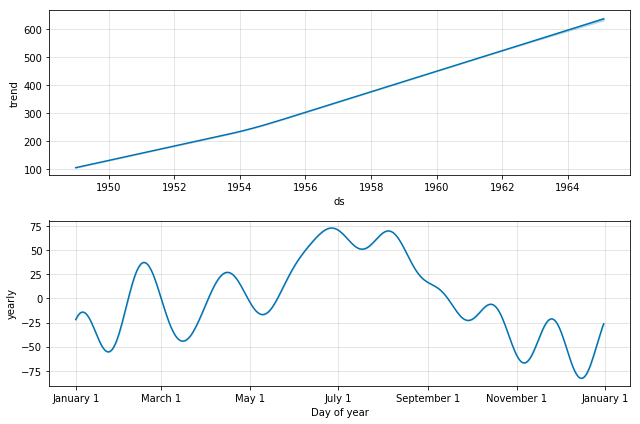

In [85]:
fig = m.plot_components(forecast)

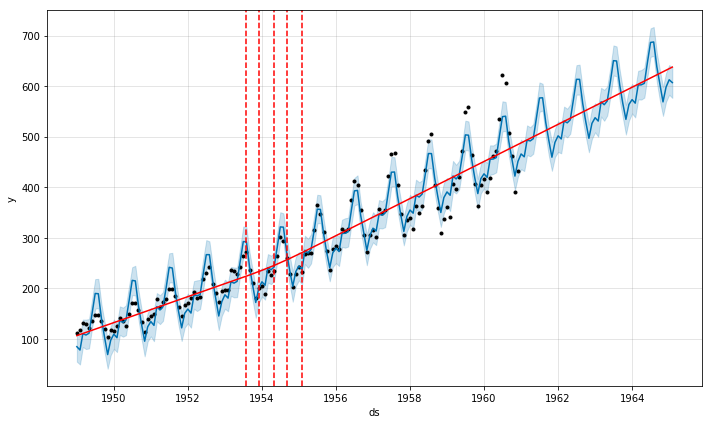

In [86]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/tsa_course/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


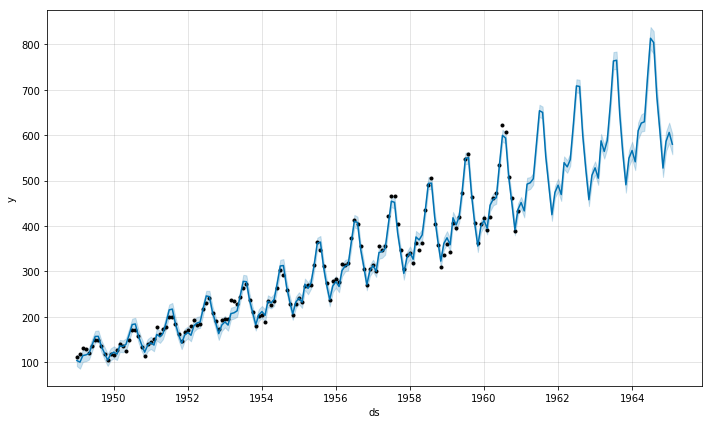

In [87]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df)
future=m.make_future_dataframe(50,freq='MS')
forecast=m.predict(future)
fig=m.plot(forecast)